In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Beyonce.csv to Beyonce.csv


In [ ]:
import pandas as pd

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('Beyonce.csv')

# Display the first few rows
print(df.head())

   Unnamed: 0   Artist          Title     Album    Year        Date  \
0           0  Beyoncé  Drunk in Love   BEYONCÉ  2013.0  2013-12-17   
1           1  Beyoncé      Formation  Lemonade  2016.0  2016-02-06   
2           2  Beyoncé      Partition   BEYONCÉ  2013.0  2013-12-13   
3           3  Beyoncé           Mine   BEYONCÉ  2013.0  2013-12-13   
4           4  Beyoncé        Hold Up  Lemonade  2016.0  2016-04-23   

                                               Lyric  
0  beyoncé i've been drinkin' i've been drinkin' ...  
1  messy mya what happened at the new wil'ins bit...  
2  part  yoncé   let me hear you say hey ms carte...  
3  beyoncé i've been watching for the signs took ...  
4  hold up they don't love you like i love you sl...  


In [ ]:
# Basic statistics and missing values
summary_stats = df.describe(include='all')
missing_values = df.isnull().sum()
summary_stats, missing_values


(        Unnamed: 0   Artist                        Title  \
 count   406.000000      406                          406   
 unique         NaN        1                          406   
 top            NaN  Beyoncé  Sweet Dreams (OK DAC Remix)   
 freq           NaN      406                            1   
 mean    202.500000      NaN                          NaN   
 std     117.346353      NaN                          NaN   
 min       0.000000      NaN                          NaN   
 25%     101.250000      NaN                          NaN   
 50%     202.500000      NaN                          NaN   
 75%     303.750000      NaN                          NaN   
 max     405.000000      NaN                          NaN   
 
                              Album         Year        Date  \
 count                          310   271.000000         271   
 unique                          38          NaN         119   
 top     HOMECOMING: THE LIVE ALBUM          NaN  2019-04-17   
 freq     

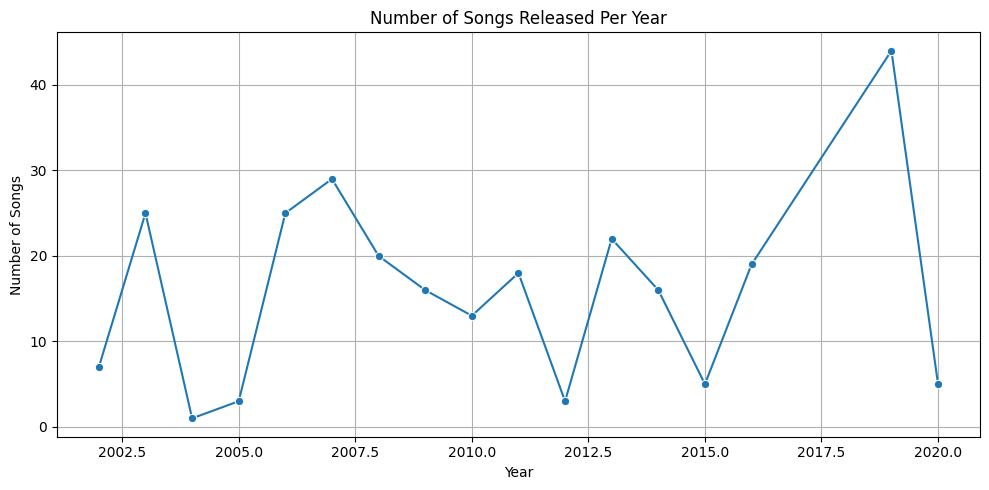

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean year column
df['Year'] = df['Year'].astype('Int64')
yearly_counts = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Songs Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.tight_layout()
plt.show()


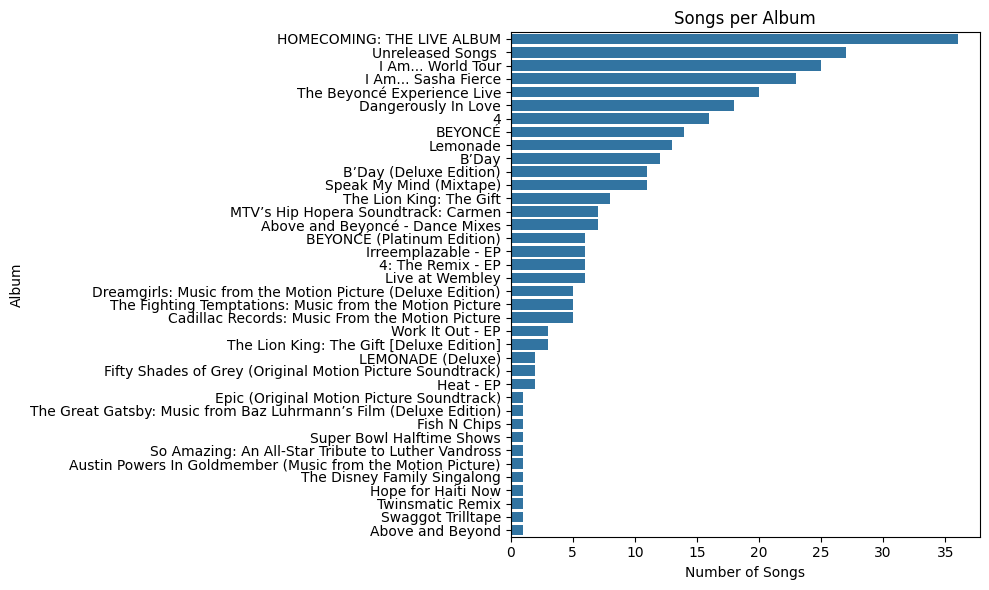

In [ ]:
album_counts = df['Album'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=album_counts.index, x=album_counts.values)
plt.title("Songs per Album")
plt.xlabel("Number of Songs")
plt.ylabel("Album")
plt.tight_layout()
plt.show()


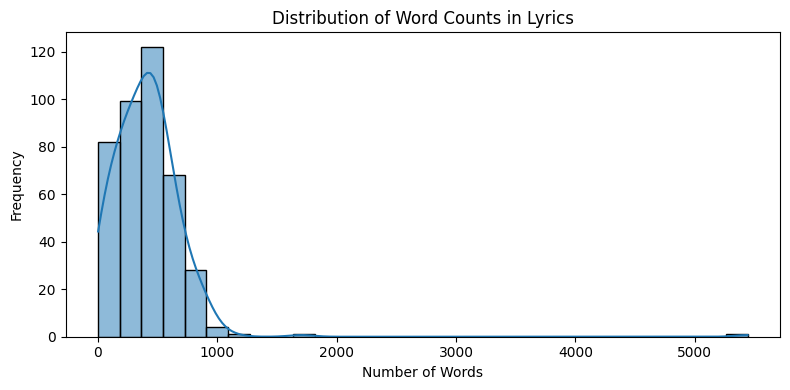

In [ ]:
df['Word Count'] = df['Lyric'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['Word Count'], bins=30, kde=True)
plt.title("Distribution of Word Counts in Lyrics")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


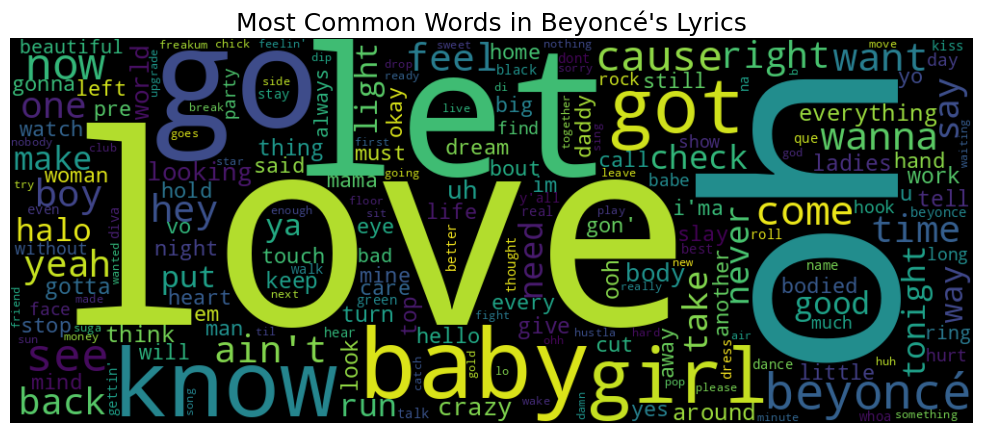

In [ ]:
from wordcloud import WordCloud

all_lyrics = " ".join(df['Lyric'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='black',
                      collocations=False).generate(all_lyrics)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Beyoncé's Lyrics", fontsize=18)
plt.show()


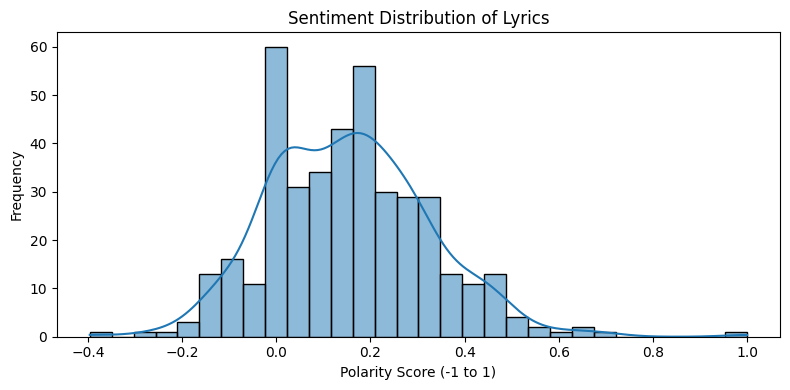

In [ ]:
from textblob import TextBlob

df['Sentiment'] = df['Lyric'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8, 4))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution of Lyrics")
plt.xlabel("Polarity Score (-1 to 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<ipython-input-9-b3adcfb04e37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_sentiment.values, y=album_sentiment.index, palette='coolwarm')


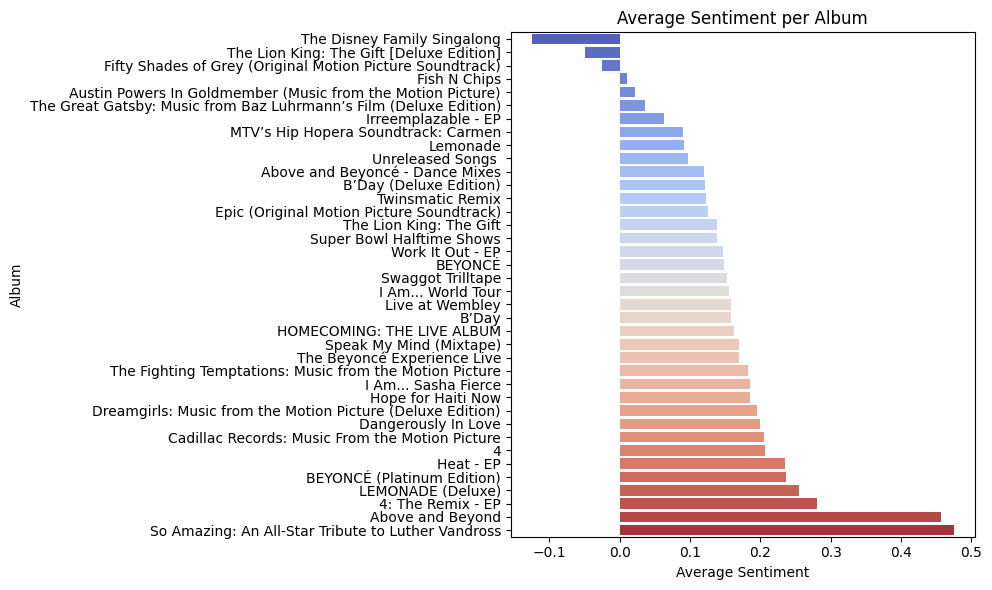

In [ ]:
album_sentiment = df.groupby('Album')['Sentiment'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=album_sentiment.values, y=album_sentiment.index, palette='coolwarm')
plt.title("Average Sentiment per Album")
plt.xlabel("Average Sentiment")
plt.ylabel("Album")
plt.tight_layout()
plt.show()


In [ ]:
longest_lyrics = df.loc[df['Word Count'].idxmax()][['Title', 'Album', 'Word Count']]
shortest_lyrics = df.loc[df['Word Count'].idxmin()][['Title', 'Album', 'Word Count']]
longest_lyrics, shortest_lyrics


(Title         Lemonade Film (Script)
 Album                       Lemonade
 Word Count                      5442
 Name: 36, dtype: object,
 Title         Royalty
 Album             NaN
 Word Count          2
 Name: 398, dtype: object)

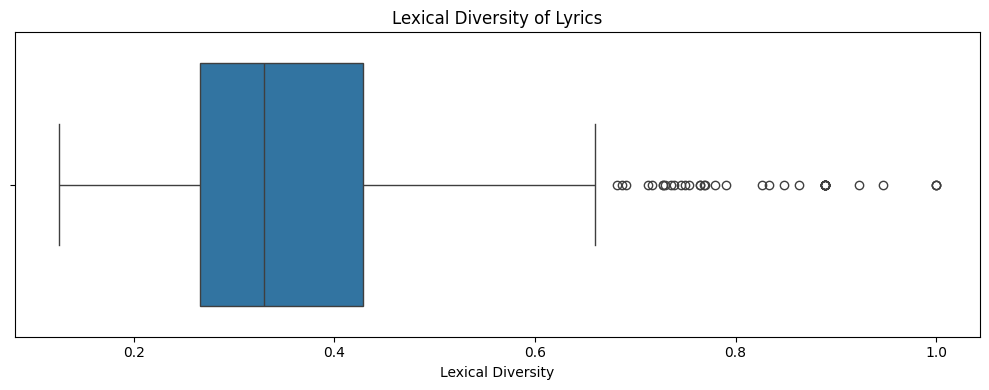

In [ ]:
df['Unique Words'] = df['Lyric'].apply(lambda x: len(set(str(x).lower().split())))
df['Lexical Diversity'] = df['Unique Words'] / df['Word Count']

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Lexical Diversity')
plt.title("Lexical Diversity of Lyrics")
plt.tight_layout()
plt.show()


<ipython-input-12-73ad0de7a3f2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_distribution.index.astype(str), y=decade_distribution.values, palette="pastel")


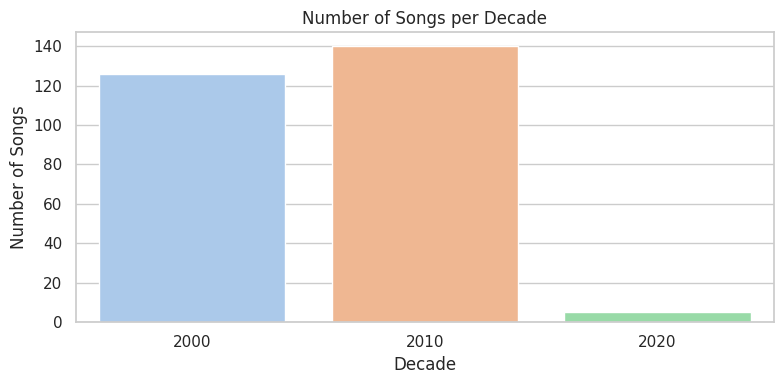

<ipython-input-12-73ad0de7a3f2>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_per_album.head().values, y=words_per_album.head().index, palette="Blues_d")


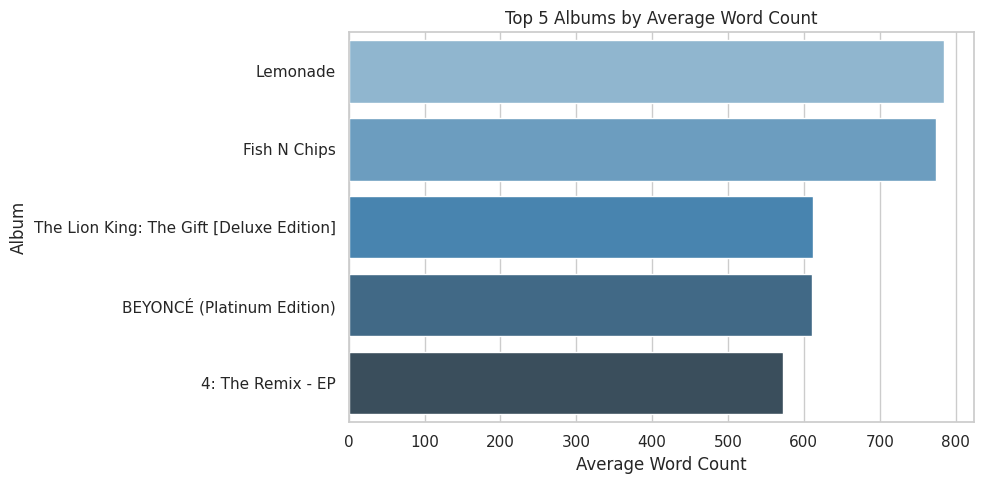

<ipython-input-12-73ad0de7a3f2>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lexical.values, y=top_lexical.index, palette="Greens_d")


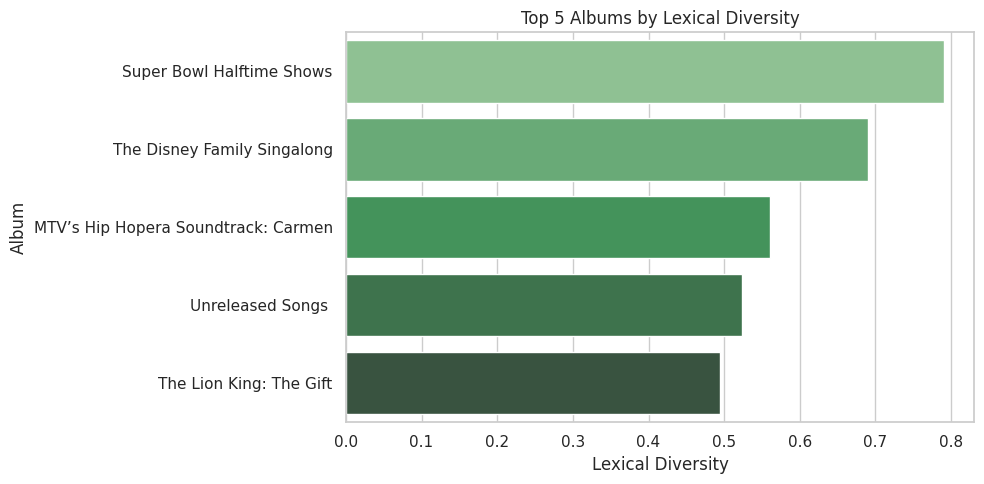

<ipython-input-12-73ad0de7a3f2>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(title_word_counts), y=list(title_word_labels), palette="magma")


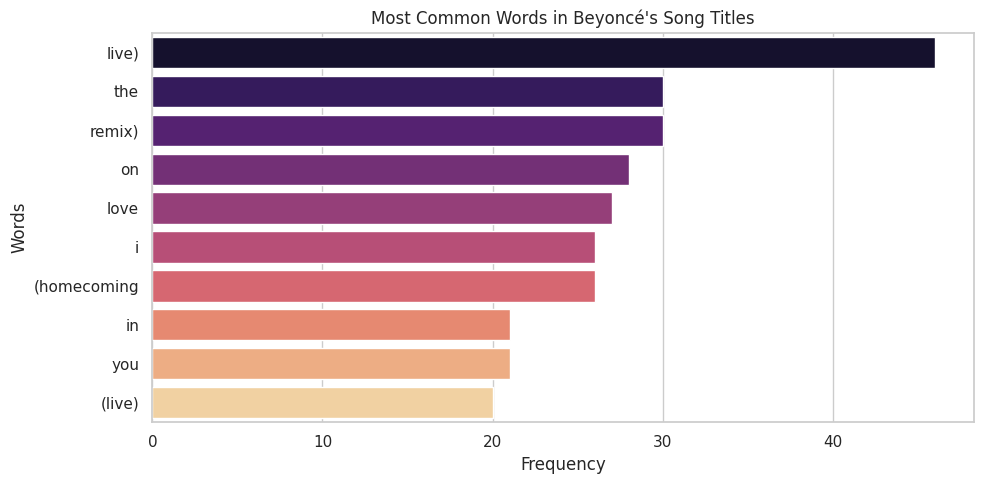

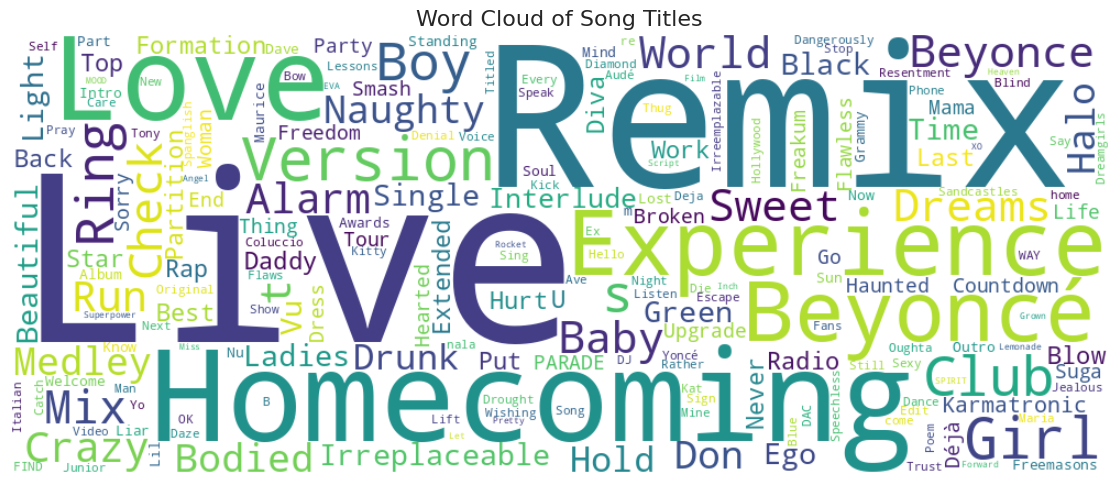

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Load data
df = pd.read_csv("Beyonce.csv")

# Preprocessing
df['Lyric'] = df['Lyric'].astype(str)
df['Word Count'] = df['Lyric'].apply(lambda x: len(x.split()))
df['Unique Words'] = df['Lyric'].apply(lambda x: len(set(x.lower().split())))
df['Lexical Diversity'] = df['Unique Words'] / df['Word Count']
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Decade'] = (df['Year'] // 10 * 10).astype('Int64')

# Grouping
words_per_album = df.groupby('Album')['Word Count'].mean().sort_values(ascending=False)
album_word_stats = df.groupby('Album').agg(
    total_words=('Word Count', 'sum'),
    unique_words=('Unique Words', 'sum'),
    avg_lexical_diversity=('Lexical Diversity', 'mean'),
    song_count=('Title', 'count')
)
decade_distribution = df['Decade'].value_counts().sort_index()

# Title word analysis
title_words = " ".join(df['Title'].dropna().astype(str)).lower().split()
common_title_words = Counter(title_words).most_common(10)
title_word_labels, title_word_counts = zip(*common_title_words)

# Seaborn theme
sns.set_theme(style="whitegrid")

# 1. Songs Per Decade
plt.figure(figsize=(8, 4))
sns.barplot(x=decade_distribution.index.astype(str), y=decade_distribution.values, palette="pastel")
plt.title("Number of Songs per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

# 2. Top 5 Albums by Average Word Count
plt.figure(figsize=(10, 5))
sns.barplot(x=words_per_album.head().values, y=words_per_album.head().index, palette="Blues_d")
plt.title("Top 5 Albums by Average Word Count")
plt.xlabel("Average Word Count")
plt.ylabel("Album")
plt.tight_layout()
plt.show()

# 3. Top 5 Albums by Lexical Diversity
top_lexical = album_word_stats['avg_lexical_diversity'].sort_values(ascending=False).head()
plt.figure(figsize=(10, 5))
sns.barplot(x=top_lexical.values, y=top_lexical.index, palette="Greens_d")
plt.title("Top 5 Albums by Lexical Diversity")
plt.xlabel("Lexical Diversity")
plt.ylabel("Album")
plt.tight_layout()
plt.show()

# 4. Most Common Words in Titles
plt.figure(figsize=(10, 5))
sns.barplot(x=list(title_word_counts), y=list(title_word_labels), palette="magma")
plt.title("Most Common Words in Beyoncé's Song Titles")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# 5. WordCloud of Song Titles
title_text = " ".join(df['Title'].dropna().astype(str).tolist())
title_cloud = WordCloud(width=1000, height=400, background_color='white', collocations=False).generate(title_text)

plt.figure(figsize=(15, 5))
plt.imshow(title_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Song Titles", fontsize=16)
plt.tight_layout()
plt.show()


Saving Beyonce.csv to Beyonce (2).csv


<ipython-input-6-f319ba6075fb>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


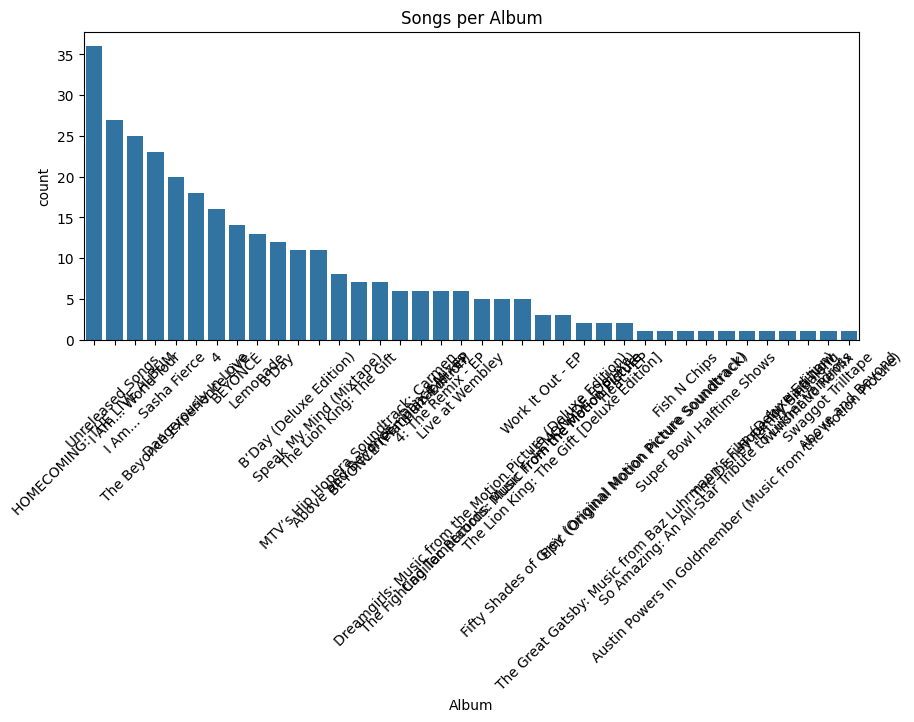

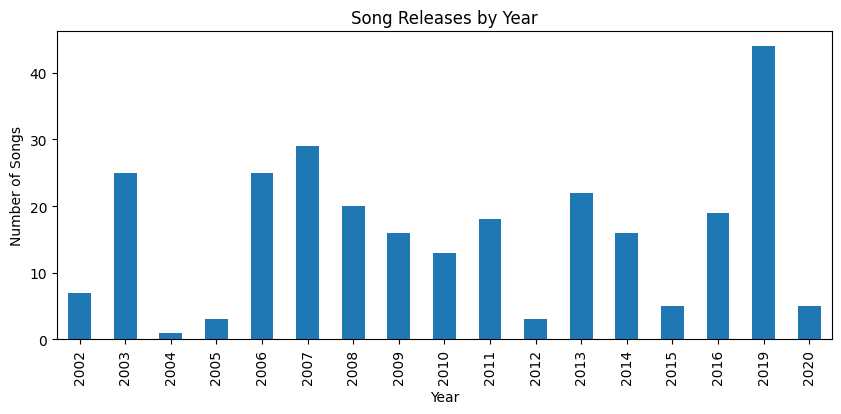

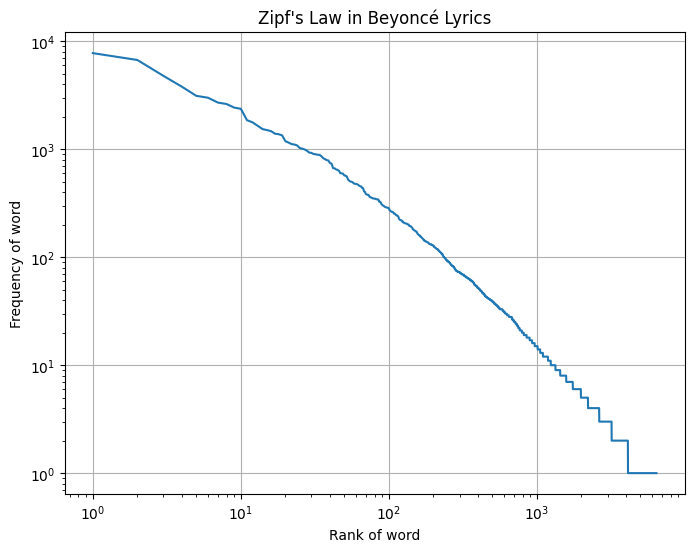

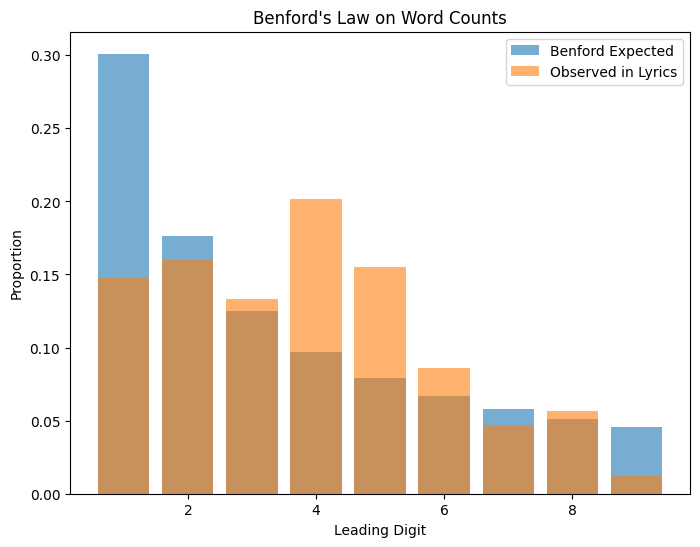

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import math

from google.colab import files
uploaded = files.upload()
# Load data
df = pd.read_csv('Beyonce.csv')

# Clean lyrics: drop missing, lowercase, remove punctuation
df['Clean_Lyric'] = df['Lyric'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)
df['Word_Count'] = df['Clean_Lyric'].str.split().apply(len)

# --- Basic EDA ---
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Album', order=df['Album'].value_counts().index)
plt.title("Songs per Album")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
df['Year'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
plt.title("Song Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.show()

# --- Zipf's Law ---
all_words = ' '.join(df['Clean_Lyric'].dropna()).split()
word_counts = Counter(all_words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
ranks = range(1, len(sorted_word_counts) + 1)
frequencies = [freq for word, freq in sorted_word_counts]

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies)
plt.title("Zipf's Law in Beyoncé Lyrics")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.grid(True)
plt.show()

# --- Benford's Law ---
def leading_digit(x):
    while x >= 10:
        x //= 10
    return x

df = df[df['Word_Count'] > 0]
df['Leading_Digit'] = df['Word_Count'].apply(leading_digit)
observed = df['Leading_Digit'].value_counts(normalize=True).sort_index()


benford = {d: math.log10(1 + 1/d) for d in range(1, 10)}

# Plot Benford's Law comparison
plt.figure(figsize=(8,6))
plt.bar(benford.keys(), benford.values(), alpha=0.6, label='Benford Expected')
plt.bar(observed.index, observed.values, alpha=0.6, label='Observed in Lyrics')
plt.title("Benford's Law on Word Counts")
plt.xlabel("Leading Digit")
plt.ylabel("Proportion")
plt.legend()
plt.show()
